In [1]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Reading the csv file
csv_path = "../Data/2007-2023-PIT-Counts-by-State.csv"
df = pd.read_csv(csv_path)
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
3,AS,0.0,,,,,,,,,...,,,,,,,,,,
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0


In [3]:
# Dropping all rows that have data from non-states
df = df[df['State'] != 'DC']
df = df[df['State'] != 'GU']
df = df[df['State'] != 'PR']
df = df[df['State'] != 'MP']
df = df[df['State'] != 'VI']

# Dropping State "AS" because it has no recorded data
df = df[df['State'] != 'AS']

# Dropping the rows that have states in the non-states list
df = df[df['State'] != 'Total']

# Dropping the final row because all the data is "NaN"
df.dropna(inplace=True)

df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


In [4]:
# Checking the count of the states column
df['State'].count()

50

In [5]:
df.head()

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,Overall Homeless - Gender that is not Singularly Female or Male,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,2.0,"1,949",302,305,"1,342",672,"1,272",5,0,...,58,35,23,58,0,61,29,32,61,0
1,AL,8.0,"2,556",312,74,"1,691",789,"1,281",6,1,...,13,8,5,13,0,18,11,7,18,0
2,AR,5.0,"2,139",193,165,"1,781",818,"1,319",0,2,...,7,7,0,7,0,8,8,0,8,0
4,AZ,3.0,"5,460","1,387",347,"3,726","2,359","3,074",21,6,...,85,39,46,85,0,111,54,57,111,0
5,CA,44.0,"57,468","12,424","4,288","39,950","25,230","31,319",338,126,...,745,373,254,627,118,963,497,295,792,171


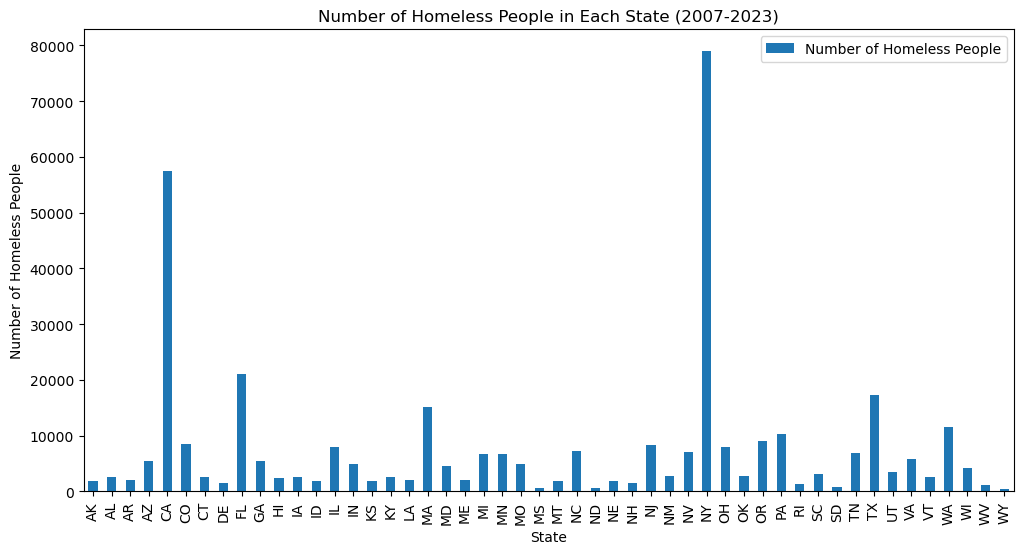

In [6]:
# Removing commas from values
df['Overall Homeless'] = df['Overall Homeless'].str.replace(",", "")
overall_homeless_df = pd.DataFrame({'Number of Homeless People': df['Overall Homeless'].values.astype(int)},
    index=df['State']
)

homeless_plot = overall_homeless_df.plot(kind='bar', title='Number of Homeless People in Each State (2007-2023)',
                                         xlabel='State', ylabel='Number of Homeless People', figsize=(12, 6));
fig = homeless_plot.get_figure()
fig.savefig('../Images/Homelessness_and_Unemployment/US_homeless_per_state.png')

In [7]:
overall_homeless_df.sort_values('Number of Homeless People')

,Number of Homeless People
State,
WY,405
ND,548
MS,626
SD,817
WV,1138
RI,1267
NH,1491
DE,1579
MT,1801


In [8]:
# Getting the total number of homeless people
overall_homeless_df['Number of Homeless People'].sum()

374702

In [9]:
state_abbreviations = {"Alabama": "AL",
                       "Alaska": "AK",
                       "Arizona": "AZ",
                       "Arkansas": "AR",
                       "California": "CA",
                       "Colorado":"CO",
                       "Connecticut": "CT",
                       "Delaware": "DE",
                       "District of Columbia": "DC",
                       "Florida": "FL",
                       "Georgia": "GA",
                       "Hawaii": "HI",
                       "Idaho": "ID",
                       "Illinois": "IL", 
                       "Indiana": "IN",
                       "Iowa": "IA",
                       "Kansas": "KS",
                       "Kentucky": "KY",
                       "Louisiana": "LA",
                       "Maine": "ME",
                       "Maryland": "MD",
                       "Massachusetts":"MA",
                       "Michigan": "MI",
                       "Minnesota": "MN",
                       "Mississippi": "MS",
                       "Missouri": "MO",
                       "Montana": "MT",
                       "Nebraska": "NE",
                       "Nevada": "NV",
                       "New Hampshire": "NH",
                       "New Jersey": "NJ",
                       "New Mexico": "NM", 
                       "New York": "NY",
                       "North Carolina": "NC",
                       "North Dakota": "ND",
                       "Ohio": "OH",
                       "Oklahoma": "OK",
                       "Oregon": "OR",
                       "Pennsylvania": "PA",
                       "Rhode Island": "RI",
                       "South Carolina": "SC",
                       "South Dakota": "SD",
                       "Tennessee": "TN",
                       "Texas": "TX",
                       "Utah": "UT",
                       "Vermont": "VT",
                       "Virginia": "VA",
                       "Washington": "WA",
                       "West Virginia": "WV",
                       "Wisconsin": "WI",
                       "Wyoming": "WY",
         }

In [10]:
# Reading median unemployment csv file
med_unemployment_csv = 'Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [11]:
# Reading the median income csv file
med_income_csv = '../Data/Median_Income.csv'
# med_income_csv = '../Work_David/Data/median_income.csv'
income_df = pd.read_csv(med_income_csv)
income_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
1,2005-01-01,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2,2006-01-01,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
3,2007-01-01,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
4,2008-01-01,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [12]:
# Cleaning the income_df dataframe
income_df['Year'] = income_df['Date'].str.split('-', expand=True)[0]
income_df = income_df.drop(columns=['Date', 'United States'])
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0,2004
1,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0,2005
2,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0,2006
3,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0,2007
4,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0,2008


In [13]:
income_df = income_df.groupby('Year').median()
income_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,48050.0,43450.0,40540.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,51240.0,44990.0,42990.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,52440.0,48480.0,45680.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,54590.0,50780.0,45790.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,50700.0,55590.0,44860.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [14]:
# Creating a dataframe for the median incomes and median unemployment rates for each state
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Income': income_df[states].median(),
                     'Median Unemployment Rate': unemployment_df[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Income,Median Unemployment Rate
Alabama,AL,44495.0,5.55
Alaska,AK,68180.0,6.60
Arizona,AZ,50750.0,5.15
Arkansas,AR,42050.0,5.25
California,CA,60640.0,6.25


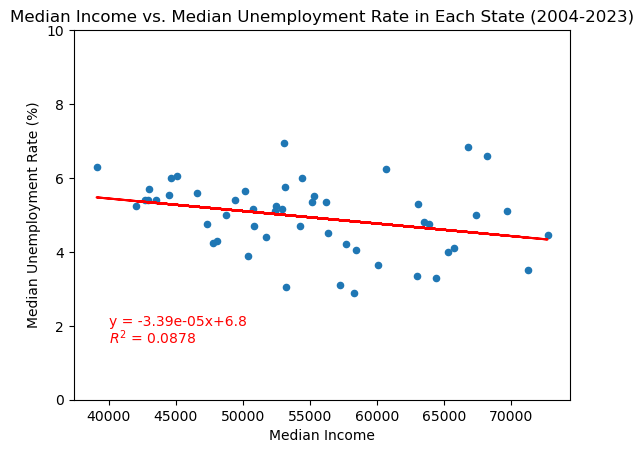

In [15]:
# Plotting the relationship of median income and median unemployment rate
plot = data.plot(kind='scatter', x='Median Income', y='Median Unemployment Rate', 
                 ylabel='Median Unemployment Rate (%)',
                 title='Median Income vs. Median Unemployment Rate in Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Income'], data['Median Unemployment Rate'])
plot.plot(data['Median Income'], intercept + slope * data['Median Income'], 'r', label='Fitted line');
plot.set_ylim(0, 10)
plot.annotate(text=f'y = {round(slope, 7)}x+{round(intercept, 2)}', xy=(40000, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(40000, 1.5), color='red');

figure = plot.get_figure()
figure.savefig('../Images/Homelessness_and_Unemployment/Linear_Regression_Median_Income_vs_Median_Unemployment_Rate.png')

In [16]:
# Reading median unemployment csv file
med_unemployment_csv = 'Data/Median_Unemployment_Rates_per_Year.csv'
unemployment_df = pd.read_csv(med_unemployment_csv)
unemployment_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Median
0,2004,5.65,7.45,4.95,5.55,6.25,5.50,5.1,4.30,8.20,...,5.30,5.95,5.05,3.65,4.1,6.25,5.70,4.95,3.80,5.30
1,2005,4.35,6.95,4.70,5.25,5.30,5.05,4.8,4.50,6.85,...,5.40,5.40,4.05,3.45,3.9,5.60,5.40,4.70,3.55,4.90
2,2006,4.00,6.65,4.40,5.30,4.90,4.35,4.4,3.95,6.35,...,5.40,5.15,2.85,3.75,3.3,5.00,5.20,4.70,3.00,4.50
3,2007,4.00,6.30,3.75,5.40,5.25,3.65,4.4,3.60,5.90,...,4.55,4.40,2.55,3.90,3.2,4.60,4.80,4.80,2.70,4.45
4,2008,5.75,6.50,5.70,5.20,7.15,4.75,5.6,4.85,6.70,...,6.50,4.75,3.20,4.55,4.2,5.25,4.55,4.65,2.85,5.25


In [17]:
# Reading homeownership csv file
homeownership_csv = '../Data/Homeownership_Rate.csv'
homeownership_df = pd.read_csv(homeownership_csv)
homeownership_df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,69.0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
1,2005-01-01,68.9,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2,2006-01-01,68.8,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
3,2007-01-01,68.1,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
4,2008-01-01,67.8,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [18]:
homeownership_df['Year'] = homeownership_df['Date'].str.split('-', expand=True)[0]
homeownership_df.drop(columns=['Date', 'United States'], inplace= True)
homeownership_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8,2004
1,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8,2005
2,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7,2006
3,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2,2007
4,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3,2008


In [19]:
median_homeowner_grp = homeownership_df.groupby('Year').median()
median_homeowner_grp.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,78.0,67.2,68.7,69.1,59.7,71.1,71.7,77.3,45.6,72.2,...,68.5,71.6,65.5,74.9,72.0,73.4,66.0,80.3,73.3,72.8
2005,76.6,66.0,71.1,69.2,59.7,71.0,70.5,75.8,45.8,72.4,...,68.4,72.4,65.9,73.9,74.2,71.2,67.6,81.3,71.1,72.8
2006,74.2,67.2,71.6,70.8,60.2,70.1,71.1,76.8,45.9,72.4,...,70.6,71.3,66.0,73.5,74.0,71.1,66.7,78.4,70.2,73.7
2007,73.3,66.6,70.4,69.5,58.3,70.2,70.3,76.8,47.2,71.8,...,70.4,70.2,66.0,74.9,73.7,71.5,66.8,77.6,70.5,73.2
2008,73.0,66.4,69.1,68.9,57.5,69.0,70.7,76.2,44.1,71.1,...,70.4,71.7,65.5,76.2,72.8,70.6,66.2,77.8,70.4,73.3


In [20]:
states = unemployment_df.columns.unique()
states = states.drop(['Year', 'Median'])
data = pd.DataFrame({'State': state_abbreviations,
                     'Median Unemployment Rate': unemployment_df[states].median(),
                     'Median Homeownership Rate': median_homeowner_grp[states].median()})
data.set_index('State', inplace=False)
data.head()

,State,Median Unemployment Rate,Median Homeownership Rate
Alabama,AL,5.55,72.95
Alaska,AK,6.60,65.00
Arizona,AZ,5.15,66.30
Arkansas,AR,5.25,67.35
California,CA,6.25,55.30


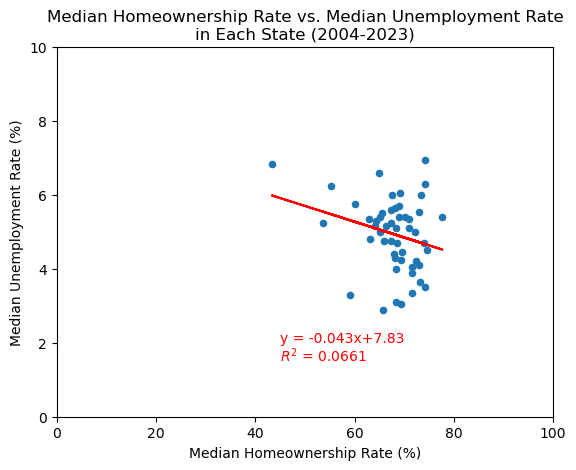

In [21]:
# Plotting the relationship of median homeownersip rate and median unemployment rate
plot = data.plot(kind='scatter', x='Median Homeownership Rate', y='Median Unemployment Rate', 
                 xlabel='Median Homeownership Rate (%)', ylabel='Median Unemployment Rate (%)',
                 title='Median Homeownership Rate vs. Median Unemployment Rate\nin Each State (2004-2023)');

# Calculating the linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(data['Median Homeownership Rate'], data['Median Unemployment Rate'])
plot.plot(data['Median Homeownership Rate'], intercept + slope * data['Median Homeownership Rate'], 'r', label='Fitted line');
plot.annotate(text=f'y = {round(slope, 3)}x+{round(intercept, 2)}', xy=(45, 2), color='red');
plot.annotate(text=f'$R^2$ = {round(r_value**2, 4)}', xy=(45, 1.5), color='red');

plot.set_xlim(0, 100)
plot.set_ylim(0, 10)

# Saving the image
figure = plot.get_figure()
figure.savefig('../Images/Homelessness_and_Unemployment/Linear_Regression_Median_Homeownership_Rate_vs_Median_Unemployment_Rate.png')

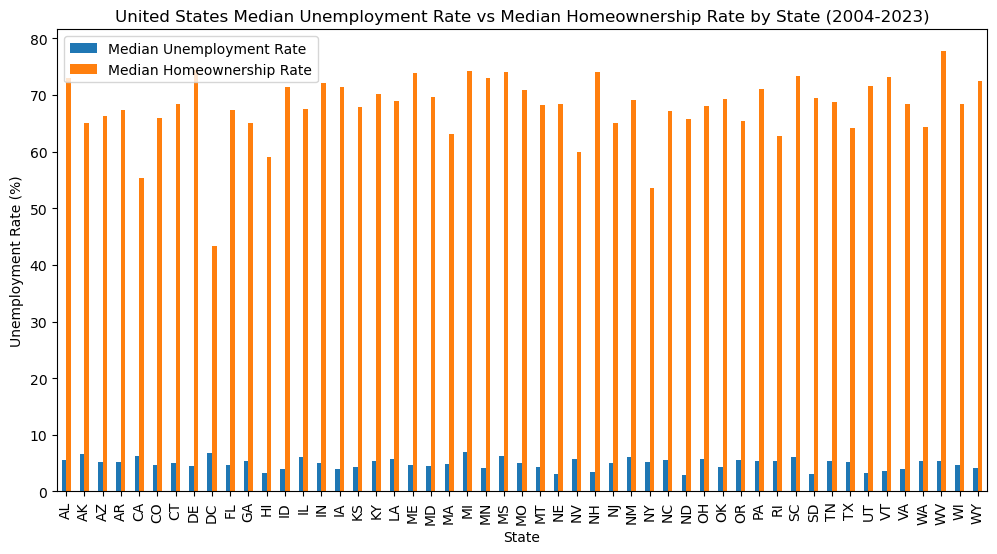

In [22]:
# Graphing the relationship of median homeownersip rate and median unemployment rate
graph = data.plot(kind='bar', title='United States Median Unemployment Rate vs Median Homeownership Rate by State (2004-2023)', 
                  x='State', xlabel='State', ylabel='Unemployment Rate (%)',
                  figsize=(12, 6));
figure2 = graph.get_figure()

In [23]:
unemployment_csv = '../Data/Unemployment.csv'
df = pd.read_csv(unemployment_csv)
df.head()

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,...,3.5,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1
1,2004-02-01,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,...,3.5,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0
2,2004-03-01,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,...,3.5,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9
3,2004-04-01,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,...,3.5,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9
4,2004-05-01,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,...,3.6,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8


In [24]:
df['Year'] = df['Date'].str.split('-', expand=True)[0]
df.drop(columns=['Date'], inplace= True)
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,4.0,...,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1,2004
1,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,4.0,...,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0,2004
2,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,3.9,...,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9,2004
3,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,3.9,...,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9,2004
4,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,3.9,...,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8,2004


In [25]:
# Averaging the data
avg_year_grp = df.groupby('Year').mean()

# Getting the median of all the data
med_year_grp = df.groupby('Year').median()

In [26]:
# Creating the "Average" column in the avg_year_grp
avg_year_grp['Average'] = avg_year_grp.mean(axis=1)

# Creating the "Median" column in the med_year_grp
med_year_grp['Median'] = med_year_grp.median(axis=1)

# Saving the data to csv files
avg_year_grp.to_csv('Data/Average_Unemployment_Rates_per_Year.csv')
med_year_grp.to_csv('Data/Median_Unemployment_Rates_per_Year.csv')

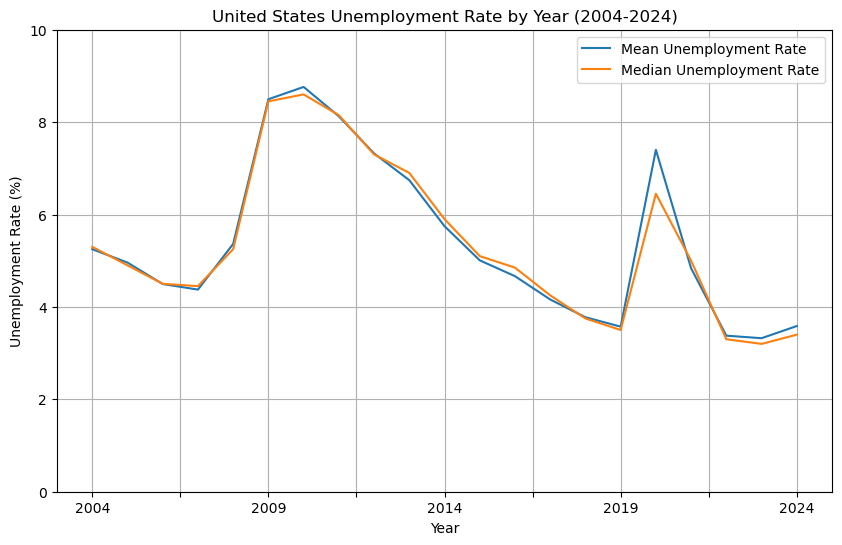

In [27]:
# Plotting the average and the median unemployment rate
overall_unemployed = pd.DataFrame({'Mean Unemployment Rate': avg_year_grp['Average'],
                                   'Median Unemployment Rate': med_year_grp['Median']}, index=df['Year'].unique())
us_plot = overall_unemployed.plot(kind='line', title='United States Unemployment Rate by Year (2004-2024)', 
                                  xlabel='Year', ylabel='Unemployment Rate (%)', figsize=(10, 6),
                                  ylim=(0, 10), grid=True);
fig1 = us_plot.get_figure()
fig1.savefig('../Images/Homelessness_and_Unemployment/US_unemployment_per_year.png')

In [28]:
states = df.columns.unique()
states = states.drop('Year')
states_totals = pd.DataFrame({'State': state_abbreviations,
                              'Mean Unemployment Rate': df[states].mean(),
                              'Median Unemployment Rate': df[states].median()})
states_totals.set_index('State', inplace=True)
states_totals.head()

,Mean Unemployment Rate,Median Unemployment Rate
State,,
AL,5.632530,5.1
AK,6.563454,6.6
AZ,6.038153,5.2
AR,5.285542,5.3
CA,7.110843,5.8


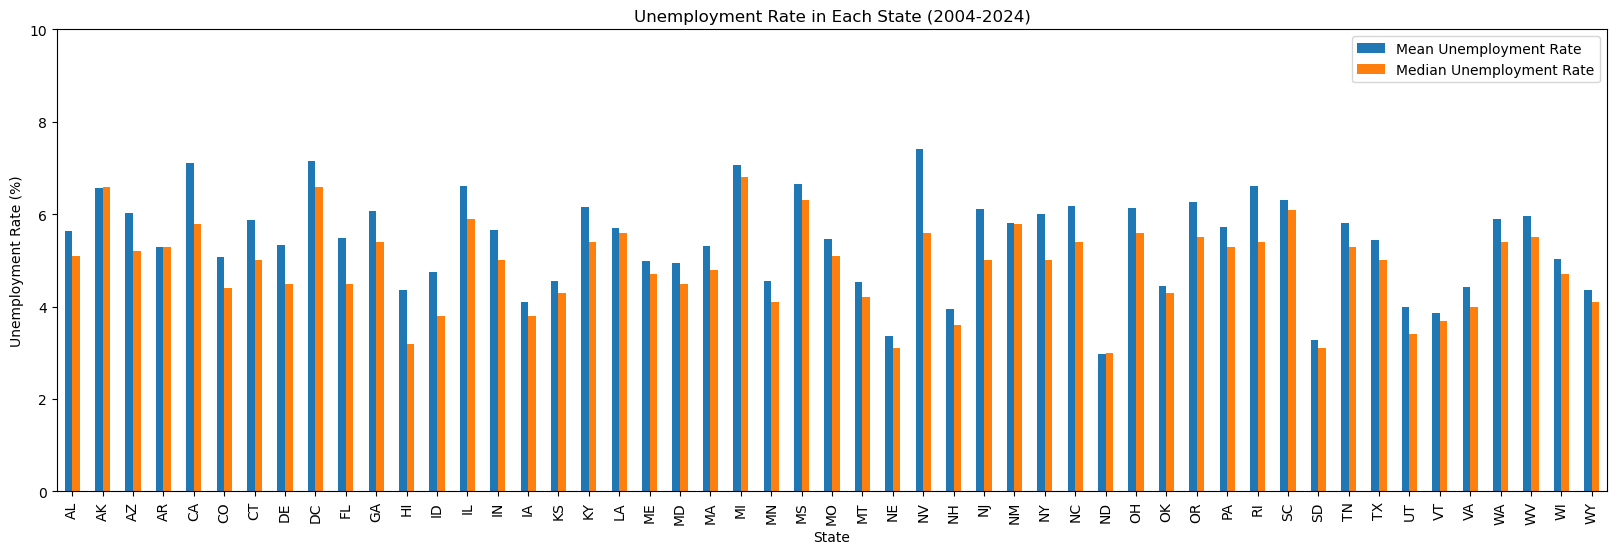

In [29]:
unemployment_plot = states_totals.plot(kind='bar', title='Unemployment Rate in Each State (2004-2024)',
                                       xlabel='State', ylabel='Unemployment Rate (%)', figsize=(20, 6),
                                       ylim=(0, 10));
fig2 = unemployment_plot.get_figure()
fig2.savefig('../Images/Homelessness_and_Unemployment/US_unemployment_per_state.png')